<a href="https://colab.research.google.com/github/sonvijain/animal-health-classification/blob/main/Animal_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) IMPORTING LIBRARIES AND DATASET**


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
from difflib import SequenceMatcher
from textblob import TextBlob

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

**IMPORTING DATASET FROM KAGGLE**

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stutinarain","key":"13d6dfa4c50ba68044f5f3bf6c861ec6"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
girumwondemagegn/dataset-for-renewable-energy-systems               Dataset for renewable energy systems                853KB  2024-05-17 23:51:25            846         24  1.0              
zeesolver/spotfy                                                    Spotify Songs Album                                  47KB  2024-05-10 09:21:57            990         22  1.0              
rahulvyasm/netflix-movies-and-tv-shows                              Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38          23836        512  1.0              
vladimirmijatovic/data-scientists-salari

In [ ]:
!kaggle datasets download -d gracehephzibahm/animal-disease

Dataset URL: https://www.kaggle.com/datasets/gracehephzibahm/animal-disease
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 18.5MB/s]


In [ ]:
!unzip animal-disease.zip

Archive:  animal-disease.zip
  inflating: data.csv                


# **2) EXPLORATORY DATA ANALYSIS**

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(871, 7)

In [ ]:
data.columns

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')

In [ ]:
data.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('symptoms2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('symptoms3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('symptoms4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('symptoms5').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['symptoms3'].value_counts()
    for x_label, grp in _df_4.groupby('symptoms2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('symptoms2')
_ = plt.ylabel('symptoms3')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['symptoms4'].value_counts()
    for x_label, grp in _df_5.groupby('symptoms3')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('symptoms3')
_ = plt.ylabel('symptoms4')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['symptoms5'].value_counts()
    for x_label, grp in _df_6.groupby('symptoms4')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('symptoms4')
_ = plt.ylabel('symptoms5')

In [ ]:
data.tail()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes
870,Buffaloes,Greenish-yellow nasal discharge,Lack of pigmentation,Vomiting,Lethargy,Pain on face,Yes


In [ ]:
data.dtypes

AnimalName    object
symptoms1     object
symptoms2     object
symptoms3     object
symptoms4     object
symptoms5     object
Dangerous     object
dtype: object

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


# **3) CLEANING THE DATA**

**A) FINDING NULL VALUES**



In [ ]:
data.isna().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

**here we can see that there are two rows with null value in the dangerous column**

**let's look at them**

In [ ]:
data[data['Dangerous'].isna()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


**checking each column to see if there are any other NULL values**

In [ ]:
data[(data['symptoms1'] == 'Teeth griding')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [ ]:
data[(data['symptoms2'] == 'Apathy') ]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [ ]:
data[(data['symptoms3'] == 'Dehydration')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
267,Sheep,Fever,Wasting,Dehydration,Deability,Weakness,Yes
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
292,Sheep,Poor immune function,Achomotrica,Dehydration,Death,Pains,Yes
314,Sheep,Inability to digest,Diarrhea,Dehydration,Weight loss,Anemia,Yes
693,Buffaloes,Fever,Wasting,Dehydration,Deability,Weakness,Yes
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
718,Pig,Poor immune function,Achomotrica,Dehydration,Death,Pains,Yes
740,Pig,Inability to digest,Diarrhea,Dehydration,Weight loss,Anemia,Yes


In [ ]:
data[(data['symptoms4'] == 'Ruminal stasis')]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [ ]:
data[(data['symptoms5'] == 'Watery faeces')]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


**since columns like teeth grinding, apathy, ruminal stasis and watery faeces doesn't have enough data, we'll drop those**

In [ ]:
data.dropna(inplace = True, axis = 0)


In [ ]:
data.shape


(869, 7)

**B) HANDLING ANIMAL NAMES**

In [ ]:
data["AnimalName"].unique()

array(['Dog', 'cat', 'Rabbit', 'cow', 'chicken', 'cattle', 'mammal',
       'Cattle', 'Horse', 'Turtle', 'Hamster', 'Lion', 'Fox', 'Fox ',
       'Goat', 'Deer', 'Chicken', 'Monkey', 'Birds', 'Sheep', 'Pigs',
       'Fowl', 'Duck', 'Other Birds', 'snake', 'horse', 'duck', 'donkey',
       'Donkey', 'mules', 'Elephant', 'Elk', 'Wapiti', 'Mule deer',
       'Black-tailed deer', 'Sika deer', 'White-tailed deer', 'Reindeer',
       'Moos', 'Tiger', 'Goats', 'Buffaloes', 'Dogs', 'Wolves', 'Hyaenas',
       'Pig'], dtype=object)

In [ ]:
data['AnimalName'].value_counts().sort_index()

AnimalName
Birds                 37
Black-tailed deer      1
Buffaloes            128
Cattle                21
Chicken                9
Deer                  38
Dog                   34
Dogs                   1
Donkey                38
Duck                  56
Elephant              59
Elk                    1
Fowl                  62
Fox                    7
Fox                    1
Goat                  26
Goats                  2
Hamster               18
Horse                 10
Hyaenas                1
Lion                  16
Monkey                28
Moos                   1
Mule deer              1
Other Birds            6
Pig                   63
Pigs                   3
Rabbit                11
Reindeer               1
Sheep                109
Sika deer              1
Tiger                 17
Turtle                 4
Wapiti                 1
White-tailed deer      1
Wolves                 1
cat                   36
cattle                 1
chicken                4
cow           

**there are repeated names so let's modify them**

In [ ]:
AnimalName = list(data['AnimalName'].str.lower().unique())
AnimalName.sort()
AnimalName

['bird',
 'buffalo',
 'cat',
 'cattle',
 'cow',
 'deer',
 'dog',
 'donkey',
 'duck',
 'elephant',
 'elk',
 'fox',
 'goat',
 'hamster',
 'hen',
 'horse',
 'hyaena',
 'lion',
 'mammal',
 'monkey',
 'mule',
 'pig',
 'rabbit',
 'reindeer',
 'sheep',
 'snake',
 'tiger',
 'turtle',
 'wapiti',
 'wolf']

In [ ]:
data['AnimalName'].replace({'black-tailed deer':'deer','white-tailed deer':'deer','mule deer':'deer','sika deer':'deer',
                            'other birds': 'bird', 'dogs': 'dog', 'fox ':'fox', 'goats': 'goat', 'moos': 'cow', 'birds': 'bird',
                            'chicken': 'hen', 'fowl': 'bird', 'buffaloes': 'buffalo', 'hyaenas': 'hyaena', 'pigs': 'pig','wolves': 'wolf',
                            'mules': 'mule'}, inplace = True)

In [ ]:
animalName = list(data['AnimalName'].str.lower().unique())
animalName.sort()
animalName

['bird',
 'buffalo',
 'cat',
 'cattle',
 'cow',
 'deer',
 'dog',
 'donkey',
 'duck',
 'elephant',
 'elk',
 'fox',
 'goat',
 'hamster',
 'hen',
 'horse',
 'hyaena',
 'lion',
 'mammal',
 'monkey',
 'mule',
 'pig',
 'rabbit',
 'reindeer',
 'sheep',
 'snake',
 'tiger',
 'turtle',
 'wapiti',
 'wolf']

In [ ]:
data['Dangerous'].unique()

array(['Yes', 'No'], dtype=object)

**C) HANDLING REPETITIVE SYMPTOMS AND MAKING EVERYTHING TO LOWER CASE TO REDUCE DATA**



In [ ]:
cols = list(data.columns)
for col in cols:
    data[col] = data[col].str.lower()

In [ ]:
s1 = set(data["symptoms1"].unique())
s2 = set(data["symptoms2"].unique())
s3 = set(data["symptoms3"].unique())
s4 = set(data["symptoms4"].unique())
s5 = set(data["symptoms5"].unique())

# Checking the total number of unique symptoms
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

876

**D) REMOVING UNWANTED SPACES**

In [ ]:
characters_unique = set()
cols = list(data.columns)
for col in cols:
    for value in data[col]:
        for letter in value:
            characters_unique.add(letter)

list(characters_unique)

['u',
 'v',
 'j',
 '(',
 'e',
 'a',
 's',
 'm',
 ',',
 'c',
 'n',
 '_',
 '-',
 'g',
 'w',
 'z',
 'x',
 'i',
 ')',
 'l',
 'q',
 't',
 'y',
 'r',
 '.',
 ' ',
 'b',
 'k',
 'p',
 'f',
 '\xa0',
 'o',
 'h',
 'd']

In [ ]:
temp = []
for ele in characters_unique:
    if ele not in string.ascii_lowercase:
        temp.append(ele)
temp

['(', ',', '_', '-', ')', '.', ' ', '\xa0']

In [ ]:
# creating a cleaning function
def clean(char):
    # Unwanted characters are being changed to space
    for extra in ['_', '-', ',', '\xa0', ' ', '.', ')', '(']:
        char = char.replace(extra, ' ')

    list_char = char.split()
    final_char = ""
    for ele in list_char:
        ele = ele.strip()

        flag = True
        for letter in ele:
            if letter not in string.ascii_lowercase:
                flag = False

        if flag:
            final_char += ele + " "

    return final_char.strip()

In [ ]:
# Performing cleaning function on all columns
cols = list(data.columns)
for col in cols:
    data[col] = data[col].apply(clean)

In [ ]:
# rechecking unique count
s1 = set(data["symptoms1"].unique())
s2 = set(data["symptoms2"].unique())
s3 = set(data["symptoms3"].unique())
s4 = set(data["symptoms4"].unique())
s5 = set(data["symptoms5"].unique())

# Checking the total number of unique symptoms
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)


862

In [ ]:
# renaming the columns
data.rename(columns={'AnimalName': 'Animal',
                   'symptoms1': 'Symptom 1',
                   'symptoms2': 'Symptom 2',
                   'symptoms3': 'Symptom 3',
                   'symptoms4': 'Symptom 4',
                   'symptoms5': 'Symptom 5'}, inplace=True)

**E) HANDLING SPELLING ERRORS**

In [ ]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Testing
similar("Apple","Appel")

0.8

In [ ]:
# Testing with actual value in the dataframe
similar('abdminal pain', 'abdominal pain')

0.9629629629629629

In [ ]:
def change(data, ws, new):
    symps = [0, 1, 2, 3, 4, 5]
    for col in symps:
        for w in ws:
            data.iloc[:, col] = data.iloc[:, col].replace(w, new)
    return data

In [ ]:
# Structuring the words and the output
s_total = list(s_total)

similarity_scores = []
for i1, word1 in enumerate(s_total):
    for i2, word2 in enumerate(s_total[i1+1:]):
        ratio = similar(word1, word2)
        if ratio > 0.75: # Keeping 0.75 as threshold
            value = [ratio, (word1, word2)]
            similarity_scores.append(value)

similarity_scores.sort(key=lambda val: val[0], reverse = True)
len(similarity_scores)
# There are many spelling mistakes

310

In [ ]:
# Similarity score >= 0.9
data = change(data = data, ws = ['difficultty in breathing', 'difficulty in breathing',
                           'difficulty breating', 'difficulty breathing',
                           'diffculty breathing', 'difficulty breathing',
                           'labored breathing', 'lound breathing',
                           'respiratory noise', 'respiratory distress',
                          'gasping for breath', 'gasping for air'], new = 'breathing difficulty')
data = change(data = data, ws = ['difficulty in walking', 'difficult in walking',
                           'limp', 'lip', 'inability to stand',
                           'difficulty in walk', 'difficulty walking', 'walking problem',
                           'lameness', 'legness'], new = 'walking difficulty')
data = change(data = data, ws = ['high body temperaure', 'high body temperature'], new = 'high body temperature')
data = change(data = data, ws = ['discharge from eye', 'discharge from eyes'], new = 'discharge from eyes')
data = change(data = data, ws = ['decreased appetite', 'decrease appetite', 'poor appetite',
                           'loss of eat', 'loss of appettite', 'loss of appetite', 'reduced appetite',
                           'loss od appetite', 'loss of appetite', 'unable to eat',
                           'loss of appetite', 'lack of appetite'], new = 'decreased appetite')
data = change(data = data, ws = ['skin color change', 'skin colour change'], new = 'skin color change')
data = change(data = data, ws = ['aversion to light', 'anversion to light'], new = 'aversion to light')
data = change(data = data, ws = ['ocular discharge', 'occular discharge',
                           'eye discharges', 'eye disharge',
                           'discharge from eyes', 'mucus discharge from the eye'], new = 'ocular discharge')
data = change(data = data, ws = ['fluffed feather', 'fluffed feathers'], new = 'fluffed feathers')
data = change(data = data, ws = ['abdominal pain', 'abdminal pain',
                           'abdonormal discomfort', 'abdominal discomfort',
                           'abdonormal pain', 'abdominal pain'], new = 'abdominal pain')
data = change(data = data, ws = ['inappetence', 'inappentence'], new = 'inappetence')
data = change(data = data, ws = ['skin reashes', 'skin rashes'], new = 'skin rashes')
data = change(data = data, ws = ['nosebleeds', 'nose bleeds',
                           'nose bleeds', 'nosebleed'], new = 'nose bleeds')
data = change(data = data, ws = ['despression', 'depression'], new = 'depression')
data = change(data = data, ws = ['weightloss', 'weight loss'], new = 'weight loss')
data = change(data = data, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
data = change(data = data, ws = ['diffulty swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
data = change(data = data, ws = ['swelling of joints', 'swelling on joints'], new = 'joints swell')
data = change(data = data, ws = ['vomitting', 'vomiting'], new = 'vomit')
data = change(data = data, ws = ['dizzines', 'dizziness'], new = 'dizziness')
data = change(data = data, ws = ['dullness', 'dull ness'], new = 'dullness')
data = change(data = data, ws = ['diarrhea', 'diarrhoea'], new = 'diarrhoea')
data = change(data = data, ws = ['head ache', 'headache',
                           'head tossing', 'head pressing'], new = 'headache')
data = change(data = data, ws = ['pneumonia', 'pnemonia'], new = 'pneumonia')
data = change(data = data, ws = ['bloody diarrhea', 'bloody diarhhea'], new = 'bloody diarrhoea')
data = change(data = data, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
data = change(data = data, ws = ['diffulty swallowing', 'difficulty swallowing',
                           'difficulty in swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
data = change(data = data, ws = ['abnormalities', 'abnormalalities'], new = 'abnormalities')
data = change(data = data, ws = ['blood in faces', 'blood on faces',
                           'blood stool', 'blood in stool'], new = 'bloody faces')
data = change(data = data, ws = ['tremor', 'tremors'], new = 'tremor')
data = change(data = data, ws = ['anemia', 'aneamia',
                          'anemia', 'anaemia'], new = 'anemia')
data = change(data = data, ws = ['hyperesthesia', 'hyperaestesia'], new = 'hyperesthesia')
data = change(data = data, ws = ['attack', 'attacks'], new = 'attack')
data = change(data = data, ws = ['lesion', 'lesions',
                          'lession on the skin', 'lession on cat skin'], new = 'lesion')
data = change(data = data, ws = ['excess salivation', 'excession salivation',
                           'excessive grooming', 'excessive drooling',
                           'excess salivation', 'excess salivary'], new = 'excess salivation')
data = change(data = data, ws = ['muscles ache', 'muscle aches'], new = 'muscle ache')
data = change(data = data, ws = ['nausea', 'nause'], new = 'nausea')
data = change(data = data, ws = ['edema', 'oedema'], new = 'edema')
data = change(data = data, ws = ['ulcers', 'ulcer'], new = 'ulcer')
data = change(data = data, ws = ['sweat', 'sweats',
                           'sweating'], new = 'sweat')
data = change(data = data, ws = ['grinding teeth', 'grinding of teeth'], new = 'grinding of teeth')
data = change(data = data, ws = ['scratching', 'scartching'], new = 'scratching')
data = change(data = data, ws = ['join pains', 'joint pain'], new = 'joint pain')
data = change(data = data, ws = ['salivating', 'salivation'], new = 'salivation')
data = change(data = data, ws = ['week pulse', 'weak pulse'], new = 'week pulse')

In [ ]:
# Similarity score >= 0.8 and <0.9
data = change(data = data, ws = ['oains', 'pain',
                           'pain', 'pains'], new = 'pain')
data = change(data = data, ws = ['shaking oh head', 'shaking head',
                            'head shking', 'head shaking'], new = 'head shaking')
data = change(data = data, ws = ['scratches', 'scartches'], new = 'scratching')
data = change(data = data, ws = ['muscle stiffness', 'muscular stiffness'], new = 'muscle stiffness')
data = change(data = data, ws = ['ruffled feathers', 'fluffed feathers',
                           'puffed up feather', 'ruffled feathers'], new = 'ruffled feathers')
data = change(data = data, ws = ['seizuers', 'seizures'], new = 'seizures')
data = change(data = data, ws = ['lathargy'], new = 'lethargy')
data = change(data = data, ws = ['weekness', 'weakness'], new = 'weakness')
data = change(data = data, ws = ['bleeding wounds', 'bleeding from wounds'], new = 'bleeding from wounds')
data = change(data = data, ws = ['gasc', 'gas'], new = 'gas')
data = change(data = data, ws = ['high temperature', 'high body temperature'], new = 'high temperature')
data = change(data = data, ws = ['fatigue', 'fatique'], new = 'fatigue')
data = change(data = data, ws = ['distress', 'stress'], new = 'stress')
data = change(data = data, ws = ['poor coat condition', 'poor condition',
                           'poor condition', 'poor body condition',
                           'poor coat condition', 'poor body condition'], new = 'poor condition')
data = change(data = data, ws = ['relunctance to move', 'reluctant move'], new = 'reluctant move')
data = change(data = data, ws = ['bloody urine', 'blood in urine'], new = 'bloody urine')
data = change(data = data, ws = ['change in gait', 'changed gait'], new = 'change in gait')
data = change(data = data, ws = ['drop in milk production', 'decrease in milk production'], new = 'decrease in milk production')
data = change(data = data, ws = ['thivk skin', 'thicked skin'], new = 'thick skin')
data = change(data = data, ws = ['tear produce', 'tear production'], new = 'tear production')
data = change(data = data, ws = ['rapid heartbeats', 'rapid heart rate'], new = 'rapid heartbeats')
data = change(data = data, ws = ['flock moratality', 'kid moratality'], new = 'flock moratality')
data = change(data = data, ws = ['skin irritation', 'irritation'], new = 'skin irritation')
data = change(data = data, ws = ['itchiness', 'itches', 'itching'], new = 'itches')
data = change(data = data, ws = ['listless', 'listlessness'], new = 'listless')
data = change(data = data, ws = ['drooping wings', 'droopy wings'], new = 'droopy wings')
data = change(data = data, ws = ['tachypea', 'trachea'], new = 'trachea')
data = change(data = data, ws = ['hot joints', 'hock joint'], new = 'hot joints')
data = change(data = data, ws = ['cough', 'coughing'], new = 'cough')
data = change(data = data, ws = ['swelling on thebody'], new = 'swelling on the body')

In [ ]:
data.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneezing,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


In [ ]:
# rechecking unique count
s1 = set(data["Symptom 1"].unique())
s2 = set(data["Symptom 2"].unique())
s3 = set(data["Symptom 3"].unique())
s4 = set(data["Symptom 4"].unique())
s5 = set(data["Symptom 5"].unique())

# Checking the total number of unique symptoms
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

740

# **4) BALANCING THE DATASET**

In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
X = data.drop(['Dangerous'], axis = 1)
Y = data['Dangerous']

In [ ]:
Y.value_counts()

Dangerous
yes    849
no      20
Name: count, dtype: int64

<Axes: ylabel='count'>

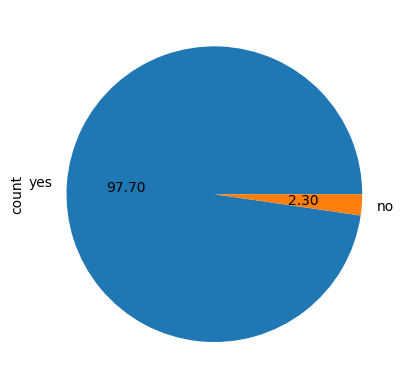

In [ ]:
#show pie chart
Y.value_counts().plot.pie(autopct= '%.2f')

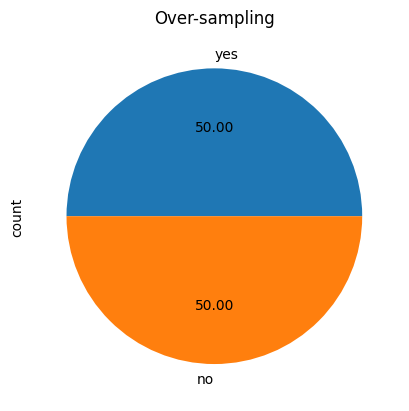

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")#string
X_res , Y_res = ros.fit_resample(X,Y)

ax = Y_res.value_counts().plot.pie(autopct= '%.2f')
_ = ax.set_title("Over-sampling")



# **5) Input Features**

In [ ]:
data

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneezing,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes
...,...,...,...,...,...,...,...
866,buffalo,fever,breathing difficulty,decreased appetite,eye and skin change,unable to exercise,yes
867,buffalo,fever,decreased appetite,lesion,lethargy,joint pain,yes
868,buffalo,lesions in the nasal cavity,lesions on nose,vomit,noisy breathing,lesions on nose,yes
869,buffalo,hair loss,dandruff,vomit,crusting of the skin,ulcerated skin,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
LE = LabelEncoder()

In [ ]:
data['enc-Symptom 1'] = LE.fit_transform(data['Symptom 1'])
data['enc-Symptom 2'] = LE.fit_transform(data['Symptom 2'])
data['enc-Symptom 3'] = LE.fit_transform(data['Symptom 3'])
data['enc-Symptom 4'] = LE.fit_transform(data['Symptom 4'])
data['enc-Symptom 5'] = LE.fit_transform(data['Symptom 5'])
data['enc-Dangerous'] = LE.fit_transform(data['Dangerous'])

In [ ]:
X=data[['enc-Symptom 1', 'enc-Symptom 2', 'enc-Symptom 3', 'enc-Symptom 4', 'enc-Symptom 5']]

In [ ]:
Y=data['enc-Dangerous']

In [ ]:
X.shape

(869, 5)

In [ ]:
Y.shape

(869,)

# **6)Splitting of Data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
X_train.shape, Y_train.shape

((695, 5), (695,))

In [ ]:
X_test.shape, Y_test.shape

((174, 5), (174,))

# **7) BUILDING A CLASSIFICATION MODEL USING RANDOM FOREST CLASSIFIER**

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

**PERFORMING PREDICTION ON A SINGLE SAMPLE FROM DATASET**


In [ ]:
X.iloc[0]

enc-Symptom 1     68
enc-Symptom 2     36
enc-Symptom 3    193
enc-Symptom 4    193
enc-Symptom 5     31
Name: 0, dtype: int64

In [ ]:
print(clf.predict([[68,36,193,193,31]]))

[1]


In [ ]:
print(clf.predict_proba([[68,36,193,193,31]]))

[[0. 1.]]


**PERFORMING PREDICTION ON TEST SET**

**A) PREDICTED CLASS LABELS**

In [ ]:
print(clf.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**B) ACTUAL CLASS LABELS**

In [ ]:
print(Y_test)

197    1
405    1
772    1
368    1
328    1
      ..
509    1
246    1
394    1
129    1
371    1
Name: enc-Dangerous, Length: 174, dtype: int64


**MODEL PERFORMANCE AND ACCURACY**

In [ ]:
print(clf.score(X_test, Y_test))

1.0
